1. importing package

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

2. Loading dataset

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df

3. Visualizations

a) Univariate Analysis 

In [ ]:
sns.displot(df.gender)

b) Bi-Variate Analysis

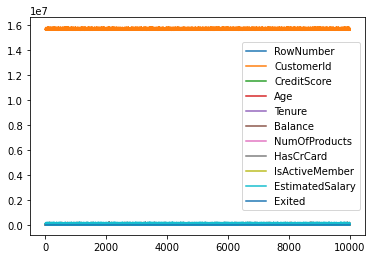

In [5]:
df.plot.line()

c) Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


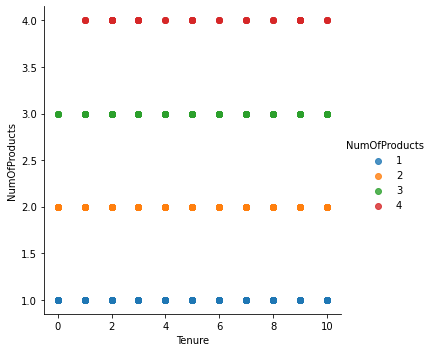

In [6]:
sns.lmplot("Tenure","NumOfProducts",df,hue="NumOfProducts", fit_reg=False);

4. Perform descriptive statistics on the dataset.

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5. Handle the Missing values.

In [8]:
data = pd.read_csv("Churn_Modelling.csv")
pd.isnull(data["Gender"])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Gender, Length: 10000, dtype: bool

6. Find the outliers and replace the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


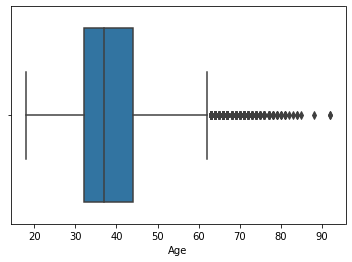

In [9]:
sns.boxplot(df['Age'])

In [10]:
df['Age']=np.where(df['Age']>50,40,df['Age'])
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


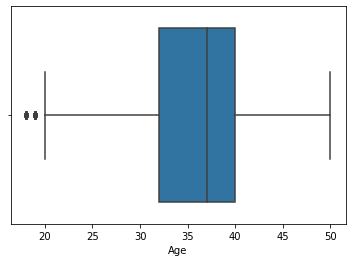

In [11]:
sns.boxplot(df['Age'])

In [12]:
df['Age']=np.where(df['Age']<20,35,df['Age'])
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

7. Check for Categorical columns and perform encoding.

In [13]:
pd.get_dummies(df, columns=["Gender", "Age"], prefix=["Age", "Gender"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46,Gender_47,Gender_48,Gender_49,Gender_50
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,0,0,1,0,0,0,0,0,0,0


8. Split the data into dependent and independent variables.

a) Split the data into Independent variables.

In [14]:
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


b) Split the data into Dependent variables.

In [15]:
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


9. Scale the independent variables

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["CustomerId"]] = scaler.fit_transform(df[["CustomerId"]])

In [17]:
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    0.275616   Hargrave          619    France  Female   42   
1             2    0.326454       Hill          608     Spain  Female   41   
2             3    0.214421       Onio          502    France  Female   42   
3             4    0.542636       Boni          699    France  Female   39   
4             5    0.688778   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    0.162119   Obijiaku          771    France    Male   39   
9996       9997    0.016765  Johnstone          516    France    Male   35   
9997       9998    0.075327        Liu          709    France  Female   36   
9998       9999    0.466637  Sabbatini          772   Germany    Male   42   
9999      10000    0.250483     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

10. Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
train_size=0.8
X = df.drop(columns = ['Tenure']).copy()
y = df['Tenure']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8000, 13)
(8000,)
(1000, 13)
(1000,)
(1000, 13)
(1000,)


(None, None)